In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import spacy
from spacy.lang.en import English

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [82]:
data_train = pd.read_csv("../../data/data_with_features/data_train_with_features.csv").drop(["Unnamed: 0"], axis=1)


0

In [83]:
data_train_scientific = data_train[data_train["classification"] == "Scientific"]
data_train_story = data_train[data_train["classification"] == "story"]
data_train_reviews = data_train[data_train["classification"] == "reviews"]
data_train_news = data_train[data_train["classification"] == "news"]


In [84]:
print("Mean number of sentences for each category")
print(data_train_scientific["num_sentences"].mean())
print(data_train_story["num_sentences"].mean())
print(data_train_reviews["num_sentences"].mean())
print(data_train_news["num_sentences"].mean())

Mean number of sentences for each category
182.492
116.832
5.222
2.894


In [85]:
print("Mean number of all words for each category")

print(data_train_scientific["num_words_with_stopwords"].mean())
print(data_train_story["num_words_with_stopwords"].mean())
print(data_train_reviews["num_words_with_stopwords"].mean())
print(data_train_news["num_words_with_stopwords"].mean())

Mean number of all words for each category
2016.412
1347.044
45.834
26.432


In [86]:
print("Mean number of words without stopswords for each category")

print(data_train_scientific["num_words_without_stopwords"].mean())
print(data_train_story["num_words_without_stopwords"].mean())
print(data_train_reviews["num_words_without_stopwords"].mean())
print(data_train_news["num_words_without_stopwords"].mean())

Mean number of words without stopswords for each category
3030.968
978.17
34.34
33.558


In [87]:
print(data_train_scientific["num_stops"].mean())
print(data_train_story["num_stops"].mean())
print(data_train_reviews["num_stops"].mean())
print(data_train_news["num_stops"].mean())

2016.412
1347.044
45.834
26.432


In [88]:
## TODO: Signifikanztests für metrische Variablen
##       Visualisierung für Worthäufigkeiten pro Klasse

In [89]:
def visualize_histogram(data, bin_size, x_label, y_label, edgecolor="black", linewidth=1):
    plt.hist(data, bins=bin_size, color="steelblue", edgecolor=edgecolor, linewidth=linewidth)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


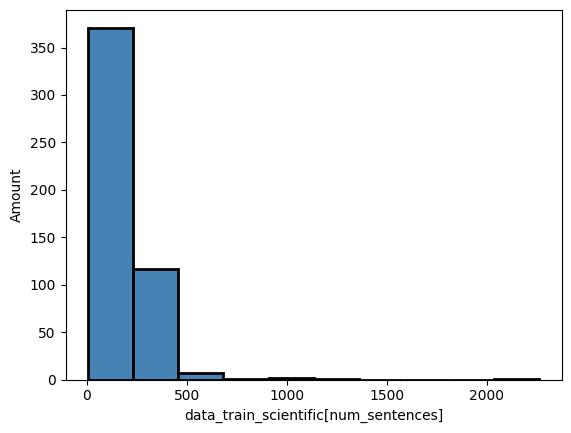

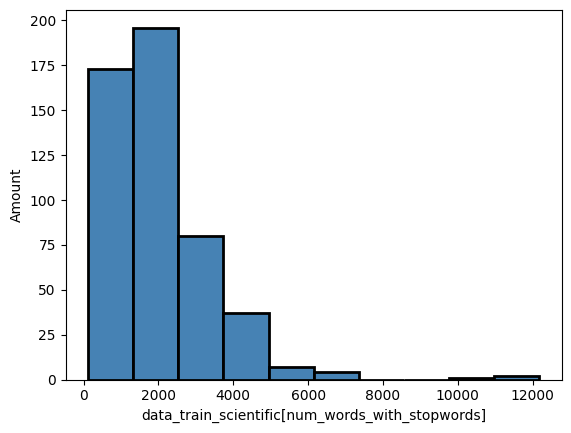

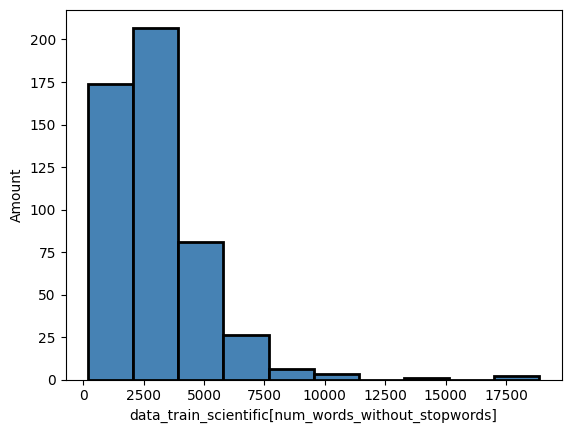

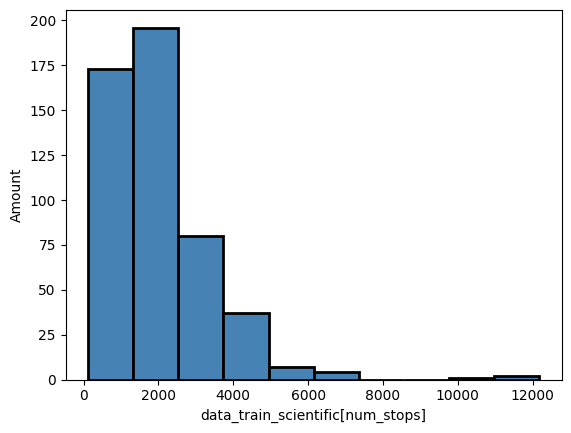

In [90]:
# Histograms for the numeric variables of the category scientific 
bin_size = 10
y_label = "Amount"

visualize_histogram(data_train_scientific["num_sentences"], bin_size, "data_train_scientific[num_sentences]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_scientific["num_words_with_stopwords"], bin_size, "data_train_scientific[num_words_with_stopwords]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_scientific["num_words_without_stopwords"], bin_size, "data_train_scientific[num_words_without_stopwords]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_scientific["num_stops"], bin_size, "data_train_scientific[num_stops]", y_label, edgecolor="black", linewidth=2)


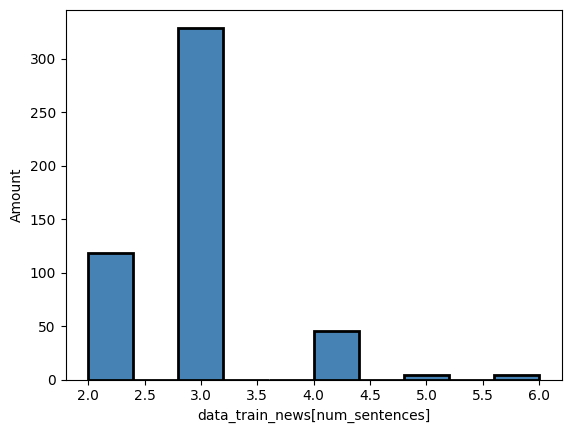

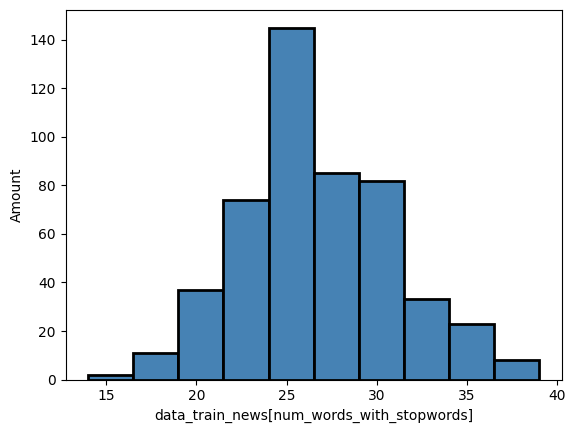

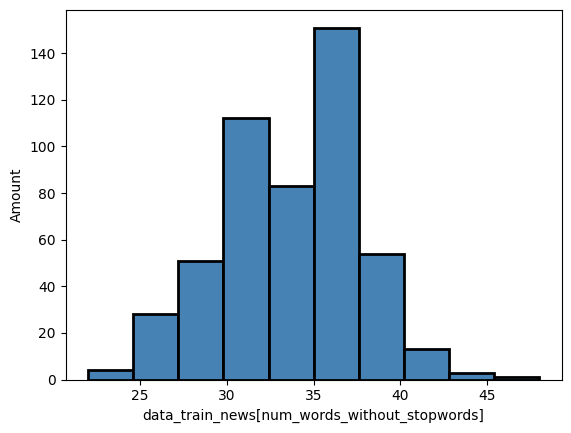

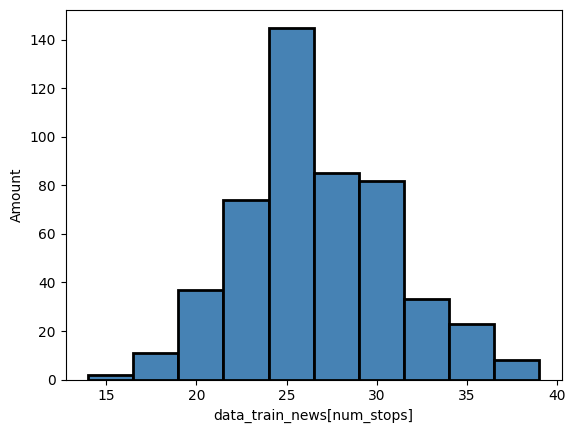

In [91]:
# Histograms for the numeric variables of the category news 
bin_size = 10
y_label = "Amount"

visualize_histogram(data_train_news["num_sentences"], bin_size, "data_train_news[num_sentences]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_news["num_words_with_stopwords"], bin_size, "data_train_news[num_words_with_stopwords]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_news["num_words_without_stopwords"], bin_size, "data_train_news[num_words_without_stopwords]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_news["num_stops"], bin_size, "data_train_news[num_stops]", y_label, edgecolor="black", linewidth=2)


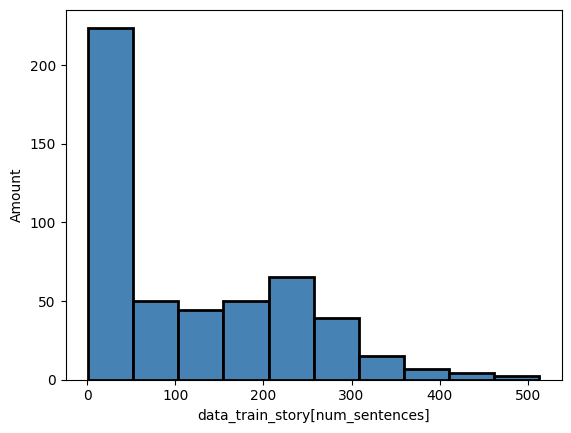

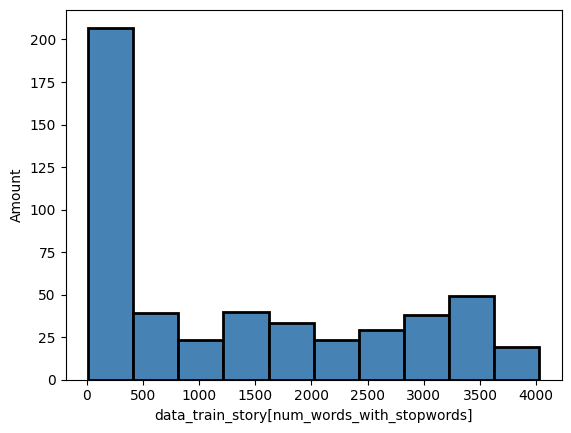

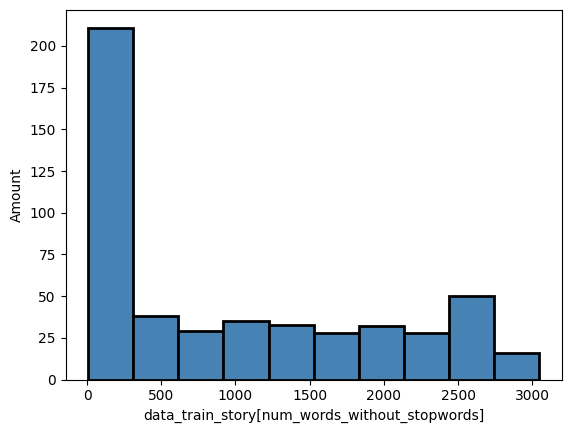

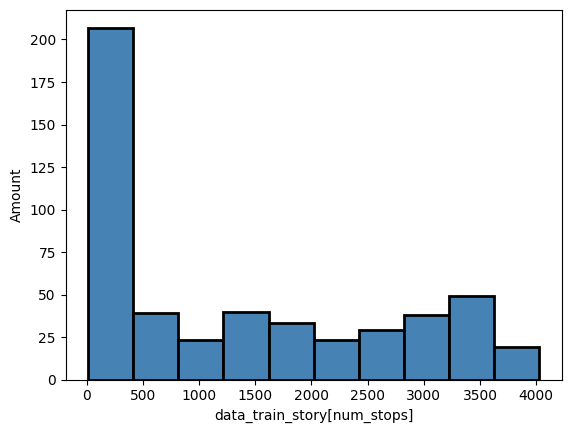

In [92]:
# Histograms for the numeric variables of the story  
bin_size = 10
y_label = "Amount"

visualize_histogram(data_train_story["num_sentences"], bin_size, "data_train_story[num_sentences]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_story["num_words_with_stopwords"], bin_size, "data_train_story[num_words_with_stopwords]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_story["num_words_without_stopwords"], bin_size, "data_train_story[num_words_without_stopwords]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_story["num_stops"], bin_size, "data_train_story[num_stops]", y_label, edgecolor="black", linewidth=2)


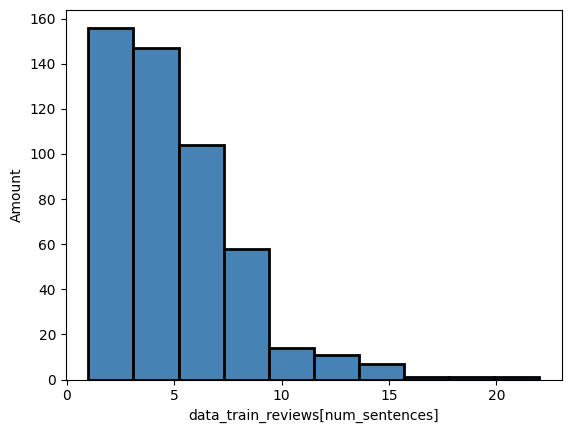

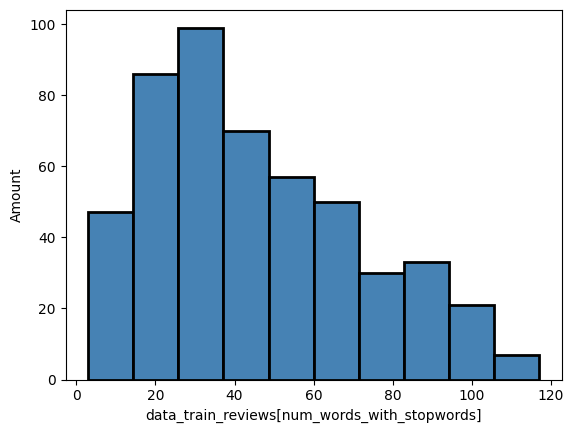

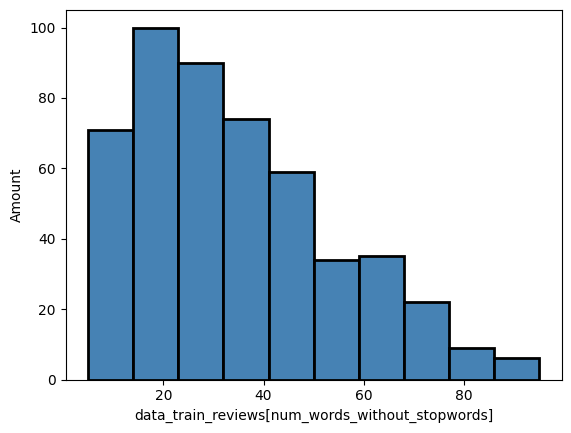

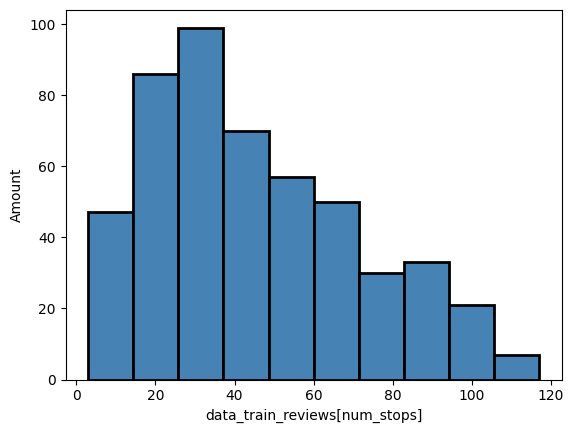

In [93]:
# Histograms for the numeric variables of the category reviews 
bin_size = 10
y_label = "Amount"

visualize_histogram(data_train_reviews["num_sentences"], bin_size, "data_train_reviews[num_sentences]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_reviews["num_words_with_stopwords"], bin_size, "data_train_reviews[num_words_with_stopwords]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_reviews["num_words_without_stopwords"], bin_size, "data_train_reviews[num_words_without_stopwords]", y_label, edgecolor="black", linewidth=2)
visualize_histogram(data_train_reviews["num_stops"], bin_size, "data_train_reviews[num_stops]", y_label, edgecolor="black", linewidth=2)


In [103]:
import pandas as pd
from scipy.stats import ttest_ind

# Create a contingency table
# num_sentences,words,num_words,lemmas,stops,num_stops
# contingency_table_num_sentences = pd.crosstab(data_train["classification"], data_train["num_sentences"])
# contingency_table_num_words = pd.crosstab(data_train["classification"], data_train["num_words"])
# contingency_table_num_stops = pd.crosstab(data_train["classification"], data_train["num_stops"])

# Sub samples of train data:
# Subsample erstellen
subdata_scientific = data_train.copy()  # Kopie des ursprünglichen DataFrame erstellen
# 'is_scientific' oder 'not_scientific' basierend auf 'classification' einfügen
subdata_scientific['binary'] = subdata_scientific['classification'].apply(lambda x: 1 if x == 'Scientific' else 0)

subdata_story = data_train.copy()  # Kopie des ursprünglichen DataFrame erstellen
# 'is_scientific' oder 'not_scientific' basierend auf 'classification' einfügen
subdata_story['binary'] = subdata_story['classification'].apply(lambda x: 1 if x == 'story' else 0)

subdata_reviews = data_train.copy()  # Kopie des ursprünglichen DataFrame erstellen
# 'is_scientific' oder 'not_scientific' basierend auf 'classification' einfügen
subdata_reviews['binary'] = subdata_reviews['classification'].apply(lambda x: 1 if x == 'reviews' else 0)

subdata_news = data_train.copy()  # Kopie des ursprünglichen DataFrame erstellen
# 'is_scientific' oder 'not_scientific' basierend auf 'classification' einfügen
subdata_news['binary'] = subdata_news['classification'].apply(lambda x: 1 if x == 'news' else 0)


list_of_subs = [subdata_scientific, subdata_story, subdata_reviews, subdata_news]
kind_of_text = ["scientific texts", "news", "reviews", "stories"]

for sub_data, i in zip(list_of_subs, kind_of_text):
    # Perform Student t-tests
    t_stat_sentences, p_value_sentences = ttest_ind(sub_data["binary"], sub_data["num_sentences"])
    t_stat_words_wst, p_value_words_wst = ttest_ind(sub_data["binary"], sub_data["num_words_with_stopwords"])
    t_stat_words_wost, p_value_words_wost = ttest_ind(sub_data["binary"], sub_data["num_words_without_stopwords"])
    t_stat_stops, p_value_stops = ttest_ind(sub_data["binary"], sub_data["num_stops"])

    # Print the results
    print("Statistical dependencies for the number of sentences in " + i)
    print("Student t-test statistic:", t_stat_sentences)
    print("P-value:", p_value_sentences)
    print("Statistical dependencies for the number of words: ")
    print("Student t-test statistic:", t_stat_words_wst)
    print("P-value:", p_value_words_wst)
    print("Statistical dependencies for the number of words without stopwords: ")
    print("Student t-test statistic:", t_stat_words_wost)
    print("P-value:", p_value_words_wost)
    print("Statistical dependencies for the number of stopwords: ")
    print("Student t-test statistic:", t_stat_stops)
    print("P-value:", p_value_stops, "\n")

# alle signifikant

Statistical dependencies for the number of sentences in scientific texts
Student t-test statistic: -27.559920161764403
P-value: 3.114435324295937e-153
Statistical dependencies for the number of words: 
Student t-test statistic: -29.88634438084174
P-value: 2.589347662017075e-177
Statistical dependencies for the number of words without stopwords: 
Student t-test statistic: -27.268813193168906
P-value: 2.598388316104264e-150
Statistical dependencies for the number of stopwords: 
Student t-test statistic: -29.88634438084174
P-value: 2.589347662017075e-177 

Statistical dependencies for the number of sentences in news
Student t-test statistic: -27.559920161764403
P-value: 3.114435324295937e-153
Statistical dependencies for the number of words: 
Student t-test statistic: -29.88634438084174
P-value: 2.589347662017075e-177
Statistical dependencies for the number of words without stopwords: 
Student t-test statistic: -27.268813193168906
P-value: 2.598388316104264e-150
Statistical dependencies f

C:\Users\jpasc\AppData\Local\Temp\ipykernel_5124\188682205.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data_train.groupby("classification").mean()


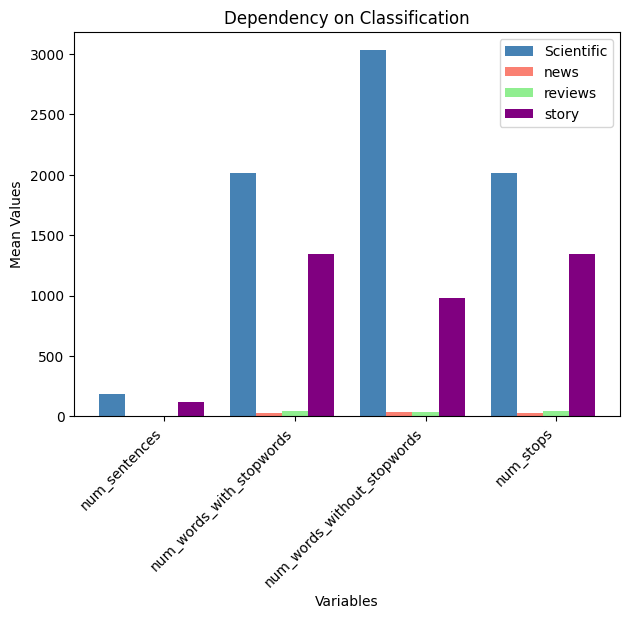

In [107]:
# Group the data by 'classification' and calculate the mean values for other variables

data_train_metric = data_train[["num_sentences", "num_words_with_stopwords", "num_words_without_stopwords", "num_stops"]].copy()
grouped_data = data_train.groupby("classification").mean()

# Get the variable names and their mean values
variable_names = grouped_data.columns.tolist()
mean_values = grouped_data.values.tolist()

# Set the color palette for the bars
colors = ["steelblue", "salmon", "lightgreen", "purple"]

# Plot the grouped bar chart
fig, ax = plt.subplots()
x = np.arange(len(variable_names))
width = 0.2

bars = []
for i, values in enumerate(mean_values):
    bar = ax.bar(x + (i * width), values, width=width, label=data_train["classification"].unique()[i], color=colors[i])
    bars.append(bar)

# Customize the plot
ax.set_xlabel("Variables")
ax.set_ylabel("Mean Values")
ax.set_title("Means of numeric variables on Classification")
ax.set_xticks(x + (len(data_train["classification"].unique()) * width) / 2)
ax.set_xticklabels(variable_names)

# Create a legend
handles = [bar[0] for bar in bars]
labels = data_train["classification"].unique()
ax.legend(handles, labels)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


C:\Users\jpasc\AppData\Local\Temp\ipykernel_5124\188682205.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data_train.groupby("classification").mean()


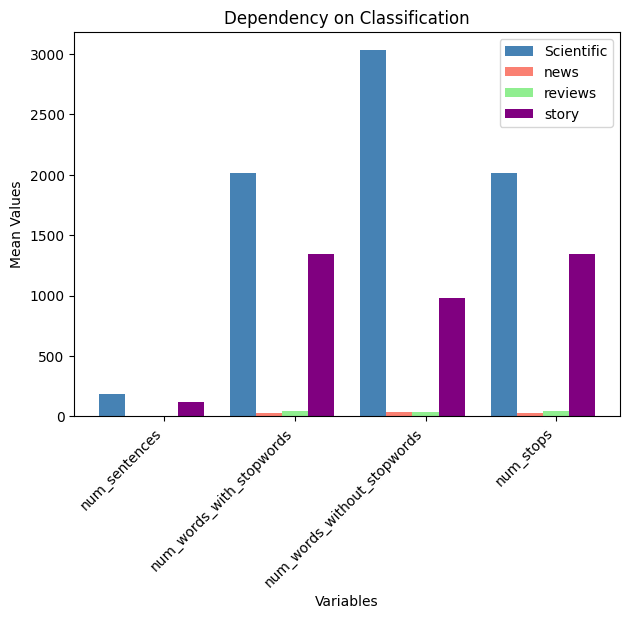

In [ ]:
# Group the data by 'classification' and calculate the mean values for other variables

data_train_metric = data_train[["num_sentences", "num_words_with_stopwords", "num_words_without_stopwords", "num_stops"]].copy()
ttest_data = data_train.groupby("classification").mean()

# Get the variable names and their mean values
variable_names = grouped_data.columns.tolist()
mean_values = grouped_data.values.tolist()

# Set the color palette for the bars
colors = ["steelblue", "salmon", "lightgreen", "purple"]

# Plot the grouped bar chart
fig, ax = plt.subplots()
x = np.arange(len(variable_names))
width = 0.2

bars = []
for i, values in enumerate(mean_values):
    bar = ax.bar(x + (i * width), values, width=width, label=data_train["classification"].unique()[i], color=colors[i])
    bars.append(bar)

# Customize the plot
ax.set_xlabel("Variables")
ax.set_ylabel("Mean Values")
ax.set_title("Means of numeric variables on Classification")
ax.set_xticks(x + (len(data_train["classification"].unique()) * width) / 2)
ax.set_xticklabels(variable_names)

# Create a legend
handles = [bar[0] for bar in bars]
labels = data_train["classification"].unique()
ax.legend(handles, labels)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [108]:
# Laden des Spacy-Modells
nlp = spacy.load('en_core_web_sm')


In [110]:

# Wörterlisten für jede Kategorie erstellen
categories = ['Scientific', 'news', 'story', 'reviews']
word_counts = {category: {'nouns': [], 'verbs': [], 'adjectives': []} for category in categories}

# Iteration über die Zeilen der CSV-Datei
for index, row in data_train.iterrows():
    text = row['text']
    category = row['classification']
    
    # Text mit Spacy analysieren
    doc = nlp(text)
    
    # Anzahl der Wörter nach POS-Tags zählen
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    verbs = [token.text for token in doc if token.pos_ == 'VERB']
    adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
    
    # Wörter zur entsprechenden Kategorie hinzufügen
    if category in categories:
        word_counts[category]['nouns'].extend(nouns)
        word_counts[category]['verbs'].extend(verbs)
        word_counts[category]['adjectives'].extend(adjectives)

# Ausgabe der Wortanzahlen für jede Kategorie
for category in categories:
    print(f'Kategorie: {category}')
    print(f'Anzahl der Nomen: {len(word_counts[category]["nouns"])}')
    print(f'Anzahl der Verben: {len(word_counts[category]["verbs"])}')
    print(f'Anzahl der Adjektive: {len(word_counts[category]["adjectives"])}')
    print('---')

Kategorie: Scientific
Anzahl der Nomen: 670253
Anzahl der Verben: 235598
Anzahl der Adjektive: 238791
---
Kategorie: news
Anzahl der Nomen: 6336
Anzahl der Verben: 4080
Anzahl der Adjektive: 1610
---
Kategorie: story
Anzahl der Nomen: 202499
Anzahl der Verben: 156395
Anzahl der Adjektive: 78445
---
Kategorie: reviews
Anzahl der Nomen: 7312
Anzahl der Verben: 4916
Anzahl der Adjektive: 3224
---


In [112]:
import statistics

# Wörterlisten für jede Kategorie erstellen
categories = ['Scientific', 'news', 'story', 'reviews']
word_counts = {category: {'nouns': [], 'verbs': [], 'adjectives': []} for category in categories}

# Iteration über die Zeilen der CSV-Datei
for index, row in data_train.iterrows():
    text = row['text']
    category = row['classification']
    
    # Text mit Spacy analysieren
    doc = nlp(text)
    
    # Anzahl der Wörter nach POS-Tags zählen
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    verbs = [token.text for token in doc if token.pos_ == 'VERB']
    adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
    
    # Wörter zur entsprechenden Kategorie hinzufügen
    if category in categories:
        word_counts[category]['nouns'].extend(nouns)
        word_counts[category]['verbs'].extend(verbs)
        word_counts[category]['adjectives'].extend(adjectives)

# Ausgabe des Mittelwerts der Wortanzahlen für jede Kategorie
for category in categories:
    print(f'Kategorie: {category}')
    noun_mean = statistics.mean([len(word) for word in word_counts[category]['nouns']])
    verb_mean = statistics.mean([len(word) for word in word_counts[category]['verbs']])
    adj_mean = statistics.mean([len(word) for word in word_counts[category]['adjectives']])
    print(f'Mittelwert der Nomen: {noun_mean}')
    print(f'Mittelwert der Verben: {verb_mean}')
    print(f'Mittelwert der Adjektive: {adj_mean}')
    print('---')

Kategorie: Scientific
Mittelwert der Nomen: 7.074189895457387
Mittelwert der Verben: 6.9566040458747525
Mittelwert der Adjektive: 7.148397552671583
---
Kategorie: news
Mittelwert der Nomen: 6.445864898989899
Mittelwert der Verben: 6.216666666666667
Mittelwert der Adjektive: 6.201242236024845
---
Kategorie: story
Mittelwert der Nomen: 5.7316579341132545
Mittelwert der Verben: 5.467930560439911
Mittelwert der Adjektive: 5.67114538848875
---
Kategorie: reviews
Mittelwert der Nomen: 5.869256017505471
Mittelwert der Verben: 5.390358014646054
Mittelwert der Adjektive: 5.9463399503722085
---


In [113]:
# Filtern der Zeilen mit größerem Wert in "num_words_with_stopwords" als in "num_words_without_stopwords"
filtered_rows = data_train[data_train['num_words_with_stopwords'] > data_train['num_words_without_stopwords']]

# Ausgabe der gefilterten Zeilen
print(filtered_rows)

     classification                                               text  \
263      Scientific  the political idea and the political measures ...   
505            news  A 32-year-old man on Wednesday was found hangi...   
518            news  Defending the IGIMS marital declaration form, ...   
524            news  Two sunbathers, a 56-year-old man and an eight...   
535            news  US President Donald Trump's campaign could not...   
...             ...                                                ...   
1995          story  The room was large, but with a low ceiling, an...   
1996          story  "There is nothing more certain than that some ...   
1997          story  In the saloon of the fine Transatlantic liner ...   
1998          story  The trouble about this story is that it really...   
1999          story  One night about eleven o'clock I stood at the ...   

                                              sentences  num_sentences  \
263   ['the political idea and the po